# Part 2: Visual Overview of Plotting Functions

Part 1 covered the general layout and functionality of Matplotlib, but did no actually plot real data. 
Matplotlib has a number of different plotting functions -- many more than we'll cover. 
Pyplot documentation and Matplotlib gallery for more information.  

A full list and/or the gallery can be a bit overwhelming. 
First we'll break down MPL functions down and cover the most common cases, and then go over a subset of those in more detail.

Here's a simplified visual overview of matplotlib's most commonly used plot types.  Let's browse through these, and then we'll go over a few in more detail. Clicking on any of these images will take you to the code that generated them. We'll skip that for now, but feel browse through it later.

## The Basics: 1D series/points
### What we've mentioned so far
<a  href="examples/plot_example.py"><img src="images/plot_example.png"></a>
<a href="examples/scatter_example.py"><img src="images/scatter_example.png"></a>
### Other common plot types
<a href="examples/bar_example.py"><img src="images/bar_example.png"></a>
<a href="examples/fill_example.py"><img src="images/fill_example.png"></a>

## 2D Arrays and Images
<a href="examples/imshow_example.py"><img src="images/imshow_example.png"></a>
<a href="examples/pcolor_example.py"><img src="images/pcolor_example.png"></a>
<a href="examples/contour_example.py"><img src="images/contour_example.png"></a>

## Vector Fields
<a href="examples/vector_example.py"><img src="images/vector_example.png"></a>

## Data Distributions
<a href="examples/statistical_example.py"><img src="images/statistical_example.png"></a>

# Detailed Examples (of a few of these)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Input Data: 1D Series

Part 1 highlighted `ax.plot(x, y)` and `ax.scatter(x, y)` to draw lines and points, respectively.  
For now, we will explore other common plot types.

### Bar Plots: `ax.bar(...)` and `ax.barh(...)`
<img src="images/bar_example.png">

Bar plots are one of the most common plot types.  
Matplotlib's `ax.bar(...)` method can also plot general rectangles, but the default is optimized for a simple sequence of x, y values, where the rectangles have a constant width.  
There's also `ax.barh(...)` (for horizontal), which makes a constant-height assumption instead of a constant-width assumption.

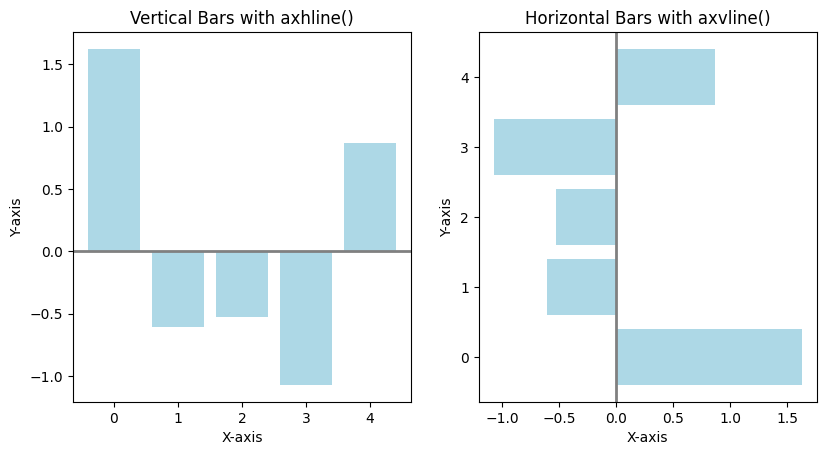

In [4]:
np.random.seed(1) # For reproducibility
x = np.arange(5) # x-coordinates
y = np.random.randn(5) # Random y-coordinates

fig, axes = plt.subplots(ncols=2, # 2 columns
                         figsize=plt.figaspect(1./2) # 2 plots side-by-side, figure aspect ratio 1:2 for the while figure
                         ) 

# Vertical bars with .bar() function
vert_bars = axes[0].bar(x, y, #X, y data
                        color='lightblue',  # Bar color
                        align='center' # Center bars on x-coordinates
                        ) 

# Horizontal bars with .barh() function
horiz_bars = axes[1].barh(x, y,  # X, y data
                          color='lightblue', # Bar color
                          align='center' # Horizontal bars centered on y-coordinates
                          ) 

# Iaxhline & axvline to draw a line all the way across the axes
# A quick-n-easy way to draw an axis "spine".
#Horizontal line at y=0
axes[0].axhline(0, # horizontal line at y=0
                color='gray', # Line color
                linewidth=2  # Line width
                )

# Vertical line at x=0
axes[1].axvline(0, # vertical line at x=0
                color='gray', # Line color
                linewidth=2  # Line width
                ) 

# Set titles
axes[0].set_title('Vertical Bars with axhline()')
axes[1].set_title('Horizontal Bars with axvline()')

#set x and y labels
axes[0].set_xlabel('X-axis')
axes[0].set_ylabel('Y-axis')
axes[1].set_xlabel('X-axis')
axes[1].set_ylabel('Y-axis')

plt.show()

Note that we held on to what `ax.bar(...)` returned.  Matplotlib plotting methods return an `Artist` or a sequence of artists.  Anything you can see in a Matplotlib figure/axes/etc is an `Artist` of some sort. Most of the time, you will not need to retain these returned objects. You will want to capture them for special customizing that may not be possible through the normal plotting mechanism.

Let's re-visit that last example and modify what's plotted.  In the case of `bar`, a container artist is returned, so we'll modify its contents instead of the container itself (thus, `for bar in vert_bars`).

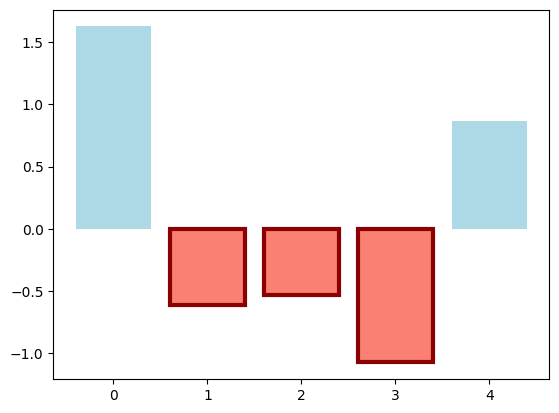

In [5]:
fig, ax = plt.subplots() # Single plot
vert_bars = ax.bar(x, y, # X, y data
                   color='lightblue', # Bar color
                   align='center' # Center bars on x-coordinates
                   )

# We could have also done this with two separate calls to `ax.bar` and numpy boolean indexing.
# Here, we'll loop through the bars and their corresponding heights.
for bar, height in zip(vert_bars, y): #loop through bars and their heights, zip means pair them up
    if height < 0: # If the height is negative
        # Change the bar color and edge color
        bar.set(color='salmon', # Fill color
                edgecolor='darkred', # Edge color
                linewidth=3 # Edge line width
                )

plt.show()

Keep in mind that any plotting method in matplotlib returns the artists that are plotted. We'll use it again, particularly when we get to adding colorbars to images.

### Filled Regions: `ax.fill(x, y)`, `fill_between(...)`, etc
<img src="images/fill_example.png">

Of these functions, `ax.fill_between(...)` is probably the one you'll use the most often.  In its most basic form, it fills between the given y-values and 0:

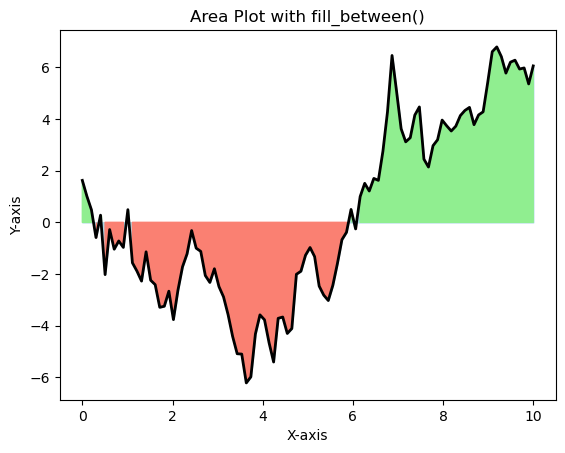

In [4]:
np.random.seed(1) # For reproducibility
y = np.random.randn(100).cumsum() # Cumulative sum of 100 random numbers
x = np.linspace(0, 10, 100) # 100 evenly spaced x-coordinates from 0 to 10

fig, ax = plt.subplots() # Single plot
# Plot for filling area under curve
ax.fill_between(x, y, # X, y data 
                color='lightblue' # Fill color
                )

#fill a different color above the y=0 line
ax.fill_between(x, y, 0, # X, y data, fill to y=0
                where=(y >= 0), # Condition for filling
                color='lightgreen' # Fill color
                )

# # fill a different color below the y=0 line
ax.fill_between(x, y, 0, # X, y data, fill to y=0
                where=(y < 0), # Condition for filling
                color='salmon' # Fill color
                )



# Plot line on top of filled area
ax.plot(x, y, # X, y data
        color='black', # Line color
        linewidth=2 # Line width
        )

# Set title and labels
ax.set_title('Area Plot with fill_between()')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.show()

The `ax.fill_between(...)` function  can also be used to fill between two curves.  This is particularly useful when you want to show an envelope of some sort (e.g. error, confidence, amplitude, etc).

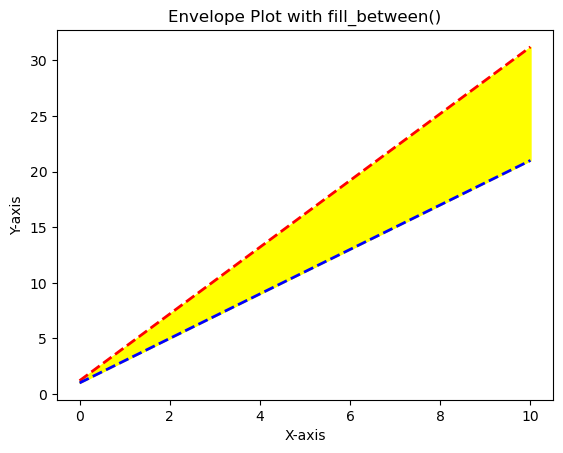

In [5]:
x = np.linspace(0, 10, 200) # 200 evenly spaced x-coordinates from 0 to 10
y1 = 2 * x + 1 # Lower envelope
y2 = 3 * x + 1.2 # Upper envelope
y_mean = 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1 # Mean line

fig, ax = plt.subplots() # Single plot

# Plot the envelope with `fill_between`
ax.fill_between(x, y1, y2, # X, lower y, upper y
                color='yellow' # Fill color
                )

#plot the high line 
ax.plot(x, y2, # X, y data
        color='red', # Line color
        linestyle='--', # Dashed line style
        linewidth=2 # Line width
        )

#plot the low line
ax.plot(x, y1, # X, y data
        color='blue', # Line color
        linestyle='--', # Dashed line style
        linewidth=2 # Line width
        )

# Plot the "centerline" with `plot`
#ax.plot(x, y_mean, color='black')

#add a title and labels
ax.set_title('Envelope Plot with fill_between()')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.show()

## `data` keyword argument

When using nested data structures such as h5py objects, Pandas DataFrames, or XArrays, the data can be accessed via `[]` like dictionary elements. This can get very repetitive and tedious as one types out a plotting command accessing those elements. The `data` keyword argument was added to pass in a single dictionary-like object as `data`, and use the string key names in the place of the usual input data arguments.

Let's revisit the above example:

/scratch/local/u1154915/865487/ipykernel_2635637/968936615.py:18: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax.plot('x','y2',# X, y data,
/scratch/local/u1154915/865487/ipykernel_2635637/968936615.py:26: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax.plot('x', 'y1', # X, y data


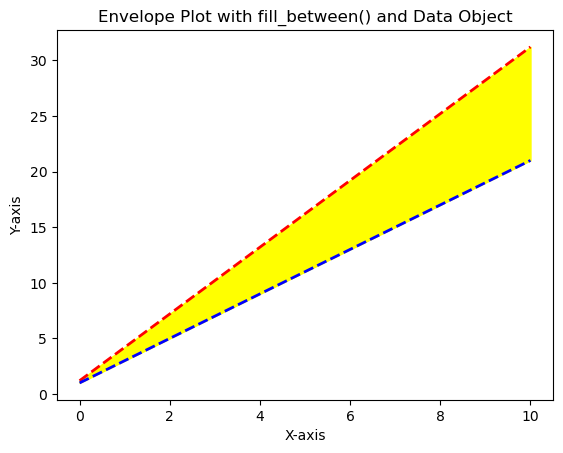

In [6]:
x = np.linspace(0, 10, 200) # 200 evenly spaced x-coordinates from 0 to 10

# Create a data object (dictionary) to hold our data
data_obj = {'x': x,
            'y1': 2 * x + 1,
            'y2': 3 * x + 1.2,
            'mean': 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1}

fig, ax = plt.subplots() # Single plot

# Plot the envelope with `fill_between`
ax.fill_between('x', 'y1', 'y2', # X, lower y, upper y 
                color='yellow', # Fill color
                data=data_obj # Data source, from our dictionary
                )

#plot the high line
ax.plot('x','y2',# X, y data, 
        color='red', # Line color
        linestyle='--', # Dashed line style
        linewidth=2, # Line width
        data=data_obj # Data source, from our dictionary
        )

#plot the low line
ax.plot('x', 'y1', # X, y data
        color='blue', # Line color  
        linestyle='--', # Dashed line style
        linewidth=2, # Line width
        data=data_obj # Data source, from our dictionary
        )

# Plot the "centerline" with `plot`
# ax.plot('x', 'mean', color='black', data=data_obj)

#add a title and labels
ax.set_title('Envelope Plot with fill_between() and Data Object')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.show()

# Exercise 2.1:

Now let's try combining `bar` and `fill_between` to make a nice prediction of what will happen as this class progresses:

Can you reproduce the figure below?
<img src="images/exercise_2.1-bar_and_fill_between.png">

In [ ]:
np.random.seed(1)

# Generate data...
y_raw = np.random.randn(1000).cumsum() + 15
x_raw = np.linspace(0, 24, y_raw.size)

# Get averages of every 100 samples...
x_pos = x_raw.reshape(-1, 100).min(axis=1)
y_avg = y_raw.reshape(-1, 100).mean(axis=1)
y_err = y_raw.reshape(-1, 100).ptp(axis=1)

bar_width = x_pos[1] - x_pos[0]

# Make a made up future prediction with a fake confidence
x_pred = np.linspace(0, 30)
y_max_pred = y_avg[0] + y_err[0] + 2.3 * x_pred
y_min_pred = y_avg[0] - y_err[0] + 1.2 * x_pred

# Just so you don't have to guess at the colors...
barcolor, linecolor, fillcolor = 'wheat', 'salmon', 'lightblue'

# Now you're on your own!


NameError: name 'np' is not defined

Next Chapter [Part3: Plotting 2D Arrays and Images.ipynb](Part3-Plotting-2D-Arrays-Images.ipynb)